# <font color='green'>Homework 1</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Fall 2022<br>
Course: Reinforcement Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from BP_reward import get_reward

# <span style="color:purple">Defining Variables</span>

In [2]:
global student_id
global action1
global action2
global num_of_actions
global num_of_patients
global ref
student_id = 'xxxxxxxxx'
action1 = 1
action2 = 2
num_of_actions = 2
num_of_patients = 100
ref = 0
np.random.seed(1234)

# <span style="color:purple">Utils</span>

In [3]:
def shift_action(action):
    if action == action1:
        action = action2
    else:
        action = action1
    
    return action

In [4]:
def store_reward_and_action(action, actions, rewards):
    reward = get_reward(action, student_id)
    actions.append(action)
    rewards.append(reward)
    return reward

In [5]:
def generate_one_over_trials_array():
    output = []
    for i in range(1, num_of_patients+1):
        output.append(1/i)
    return np.array(output)

# <span style="color:purple">Implementing Policies</span>

In [6]:
def prescribe_doctor_A():
    actions = []
    rewards = []
    p_sw = 0.8
    p_sl = 0.7
    
    # initial decision, the action in the first step
    action = np.random.rand()*num_of_actions
    if action <=action1:
        action = action1
    else:
        action = action2
    
    reward = get_reward(action, student_id)
    actions.append(action)
    rewards.append(reward)
    
    for i in range(num_of_patients - 1):
        if reward > ref:
            # win
            p = np.random.rand()
            if p < p_sw:
                # stay
                reward = store_reward_and_action(action, actions, rewards)
            else:
                # shift
                action = shift_action(action)
                reward = store_reward_and_action(action, actions, rewards)
        else:
            # lose
            p = np.random.rand()
            if p < 1 - p_sl:
                # stay
                reward = store_reward_and_action(action, actions, rewards)
            else:
                # shift
                action = shift_action(action)
                reward = store_reward_and_action(action, actions, rewards)
    
    return np.array(rewards), np.array(actions)

In [7]:
def prescribe_doctor_B():
    actions = []
    rewards = []
   
    for i in range(num_of_patients):
        action = np.random.randint(action1, action2+1)
        store_reward_and_action(action, actions, rewards)
        
    return np.array(rewards), np.array(actions)

In [8]:
def prescribe_doctor_C():
    actions = []
    rewards = []
    check_point_1 = 10
    check_point_2 = 20
    residual = 7
    divisor = 10
    
    for i in range(num_of_patients):
        if i < check_point_1:
            action = action1
            reward = store_reward_and_action(action, actions, rewards)
        elif i < check_point_2:
            action = action2
            reward = store_reward_and_action(action, actions, rewards)
        elif i%divisor < residual:
            np_actions = np.array(actions)
            np_rewards = np.array(rewards)
            sum_of_action1_rewards = np.sum(np_rewards[np_actions<=action1])
            sum_of_action2_rewards = np.sum(np_rewards[np_actions>=action2])
            if sum_of_action1_rewards > sum_of_action2_rewards:
                action = action1
            else: 
                action = action2
            reward = store_reward_and_action(action, actions, rewards)
        else:
            action = np.random.randint(action1, action2+1)
            reward = store_reward_and_action(action, actions, rewards)
        
    return np.array(rewards), np.array(actions)

# <span style="color:purple">Question 2</span>

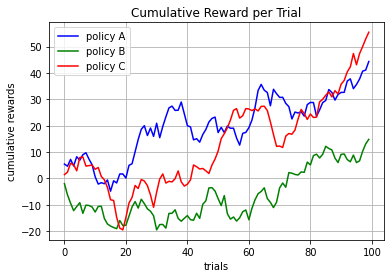

In [9]:
trials = np.arange(num_of_patients)

rewards_policy_A, _ = prescribe_doctor_A()
rewards_policy_B, _ = prescribe_doctor_B()
rewards_policy_C, _ = prescribe_doctor_C()

sum_rewards_policy_A = np.cumsum(rewards_policy_A)
sum_rewards_policy_B = np.cumsum(rewards_policy_B)
sum_rewards_policy_C = np.cumsum(rewards_policy_C)

plt.plot(trials, sum_rewards_policy_A, color='b', label='policy A')
plt.plot(trials, sum_rewards_policy_B, color='g', label='policy B')
plt.plot(trials, sum_rewards_policy_C, color='r', label='policy C')
plt.title('Cumulative Reward per Trial')
plt.xlabel('trials')
plt.ylabel('cumulative rewards')
plt.grid()
plt.legend()
plt.show()

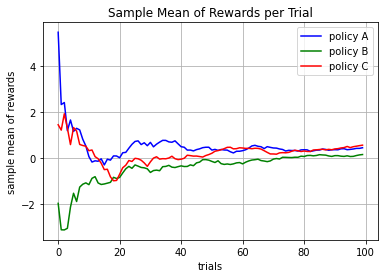

In [10]:
sample_avg_rewards_policy_A = np.cumsum(rewards_policy_A)* generate_one_over_trials_array()
sample_avg_rewards_policy_B = np.cumsum(rewards_policy_B)* generate_one_over_trials_array()
sample_avg_rewards_policy_C = np.cumsum(rewards_policy_C)* generate_one_over_trials_array()

plt.plot(trials, sample_avg_rewards_policy_A, color='b', label='policy A')
plt.plot(trials, sample_avg_rewards_policy_B, color='g', label='policy B')
plt.plot(trials, sample_avg_rewards_policy_C, color='r', label='policy C')
plt.title('Sample Mean of Rewards per Trial')
plt.xlabel('trials')
plt.ylabel('sample mean of rewards')
plt.grid()
plt.legend()
plt.show()

# <span style="color:purple">Question 3</span>

In [11]:
from scipy.stats import norm
import math

In [12]:
def calculate_mean_of_errors_for_policies(times_of_sampling):
    mean_policy_A = []
    mean_policy_B = []
    mean_policy_C = []

    for i in range(times_of_sampling):
        rewards_policy_A, _ = prescribe_doctor_A()
        rewards_policy_B, _ = prescribe_doctor_B()
        rewards_policy_C, _ = prescribe_doctor_C()
        mean_policy_A.append(np.mean(rewards_policy_A))
        mean_policy_B.append(np.mean(rewards_policy_B))
        mean_policy_C.append(np.mean(rewards_policy_C))

    return mean_policy_A, mean_policy_B, mean_policy_C

In [13]:
def fit_normal_dist_on_data(mean_policy, policy_name, times_of_sampling):
    mu, std = norm.fit(mean_policy)
    num_of_bins = int(times_of_sampling ** (1./2))+1
    plt.hist(mean_policy, bins=num_of_bins, density=True, color='orange')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results for x̅ of policy %s: mu = %.2f,  std = %.2f" % (policy_name, mu, std)
    plt.title(title)
    plt.xlabel('x̅')
    plt.ylabel('probability density')
    plt.grid()
    plt.show()
    return mu, std

In [14]:
times_of_sampling = 5
mean_policy_A, mean_policy_B, mean_policy_C = calculate_mean_of_errors_for_policies(times_of_sampling)

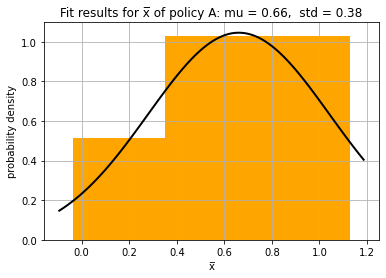

In [15]:
mu_A, std_A = fit_normal_dist_on_data(mean_policy_A, 'A', times_of_sampling)

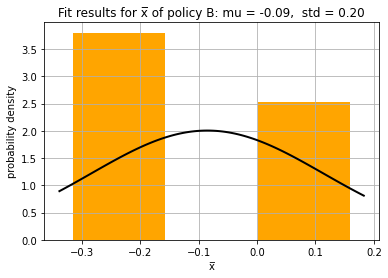

In [16]:
mu_B, std_B = fit_normal_dist_on_data(mean_policy_B, 'B', times_of_sampling)

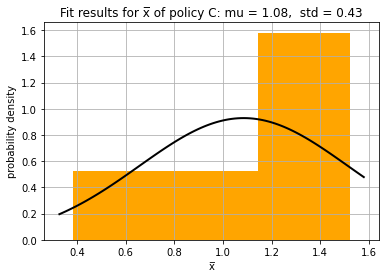

In [17]:
mu_C, std_C = fit_normal_dist_on_data(mean_policy_C, 'C', times_of_sampling)

In [18]:
times_of_sampling = 20
mean_policy_A, mean_policy_B, mean_policy_C = calculate_mean_of_errors_for_policies(times_of_sampling)

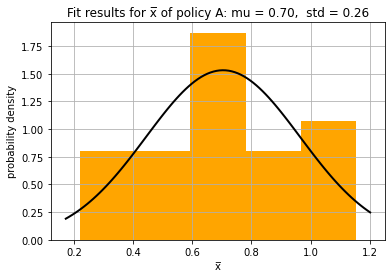

In [19]:
mu2_A, std2_A = fit_normal_dist_on_data(mean_policy_A, 'A', times_of_sampling)

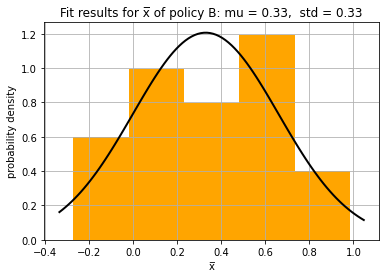

In [20]:
mu2_B, std2_B = fit_normal_dist_on_data(mean_policy_B, 'B', times_of_sampling)

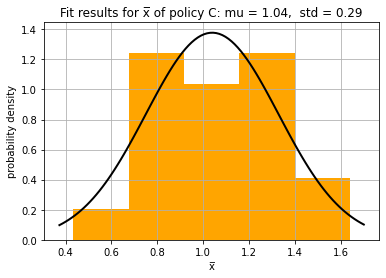

In [21]:
mu2_C, std2_C = fit_normal_dist_on_data(mean_policy_C, 'C', times_of_sampling)

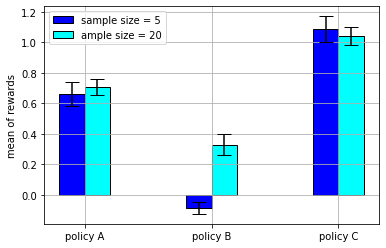

In [22]:
barWidth = 0.2
_5_times_sampling_bar = [mu_A, mu_B, mu_C]
_20_times_sampling_bar = [mu2_A, mu2_B, mu2_C]
std = [std_A, std_B, std_C]
std2 = [std2_A, std2_B, std2_C]
yerr1 = [value * (2/(num_of_patients ** (1./2))) for value in std]
yerr2 = [value * (2/(num_of_patients ** (1./2))) for value in std2]
r1 = np.arange(len(_5_times_sampling_bar))
r2 = [x + barWidth for x in r1]
plt.bar(r1, _5_times_sampling_bar, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yerr1, capsize=7, label='sample size = 5')
plt.bar(r2, _20_times_sampling_bar, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yerr2, capsize=7, label='ample size = 20')
plt.xticks([r + barWidth/2 for r in range(len(_5_times_sampling_bar))], ['policy A', 'policy B', 'policy C'])
plt.ylabel('mean of rewards')
plt.legend()
plt.grid()
plt.show()

# <span style="color:purple">Question 4</span>

In [23]:
def get_rewards_for_the_last_patient(times_of_sampling):
    rewards_for_the_last_patient_policy_A = []
    rewards_for_the_last_patient_policy_B = []
    rewards_for_the_last_patient_policy_C = []

    for i in range(times_of_sampling):
        rewards_policy_A, _ = prescribe_doctor_A()
        rewards_policy_B, _ = prescribe_doctor_B()
        rewards_policy_C, _ = prescribe_doctor_C()
        rewards_for_the_last_patient_policy_A.append(rewards_policy_A[-1])
        rewards_for_the_last_patient_policy_B.append(rewards_policy_B[-1])
        rewards_for_the_last_patient_policy_C.append(rewards_policy_C[-1])

    return rewards_for_the_last_patient_policy_A, rewards_for_the_last_patient_policy_B, rewards_for_the_last_patient_policy_C

In [24]:
times_of_sampling = 10
last_policy_A, last_policy_B, last_policy_C = get_rewards_for_the_last_patient(times_of_sampling)

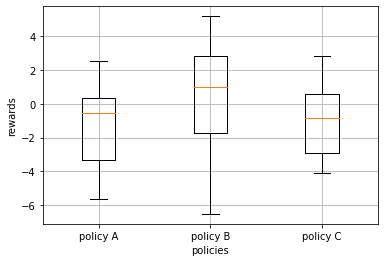

In [25]:
box_plot_data=[last_policy_A, last_policy_B, last_policy_C]
plt.boxplot(box_plot_data, labels=['policy A', 'policy B', 'policy C'])
plt.xlabel('policies')
plt.ylabel('rewards')
plt.grid()
plt.show()

# <span style="color:purple">Question 5</span>

In [26]:
from scipy.stats import t
import math

In [27]:
def caculate_p_value(rewards_policy, actions_policy, policy_name):
    alpha = 0.05
    np_actions = np.array(actions_policy)
    np_rewards = np.array(rewards_policy)
    n1 = np.sum(np_actions[np_actions<=action1])
    n2 = num_of_patients - n1
    x_bar_1 = np.mean(np_rewards[np_actions<=action1])
    x_bar_2 = np.mean(np_rewards[np_actions>=action2])
    std1 = np.std(np_rewards[np_actions<=action1])
    std2 = np.std(np_rewards[np_actions>=action2])
    standard_error = math.sqrt(((std1 ** 2)/n1) + ((std2 ** 2)/n2))
    degree_of_freedom = min(n1, n2)
    t_value = (x_bar_1 - x_bar_2) / standard_error
    p_value = 1-t.cdf(t_value, degree_of_freedom)
    print('p value of ' + policy_name + ' is: ', p_value) 
    print('Is H0 rejected? ', (p_value < alpha))

In [28]:
rewards_policy_A, actions_policy_A = prescribe_doctor_A()
rewards_policy_B, actions_policy_B = prescribe_doctor_B()
rewards_policy_C, actions_policy_C = prescribe_doctor_C()

p_value_A = caculate_p_value(rewards_policy_A, actions_policy_A, 'policy A')
p_value_B = caculate_p_value(rewards_policy_B, actions_policy_B, 'policy B')
p_value_C = caculate_p_value(rewards_policy_C, actions_policy_C, 'policy C')

p value of policy A is:  8.127012601333305e-06
Is H0 rejected?  True
p value of policy B is:  4.142628534653525e-07
Is H0 rejected?  True
p value of policy C is:  0.00046639677179560746
Is H0 rejected?  True
